<a href="https://colab.research.google.com/github/mileslilly2/Lecture-Notes-Prototype/blob/main/Extract_text_Pdf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install PyPDF2
!pip install pdfplumber
!pip install fitz
!pip install frontend
!pip install transformers torch Pillow requests
!pip install pdf2image
!apt-get install -y poppler-utils


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.3 [186 kB]
Fetched 186 kB in 0s (871 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 121654 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.3_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.3) ...
Setting up poppler-utils (22.02.0-2ubuntu0.3) ...
Processing triggers for man-db (2.10.2-1) ...


### Mount to Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/books

/content/drive/MyDrive/books


### PDF text extraction

In [ ]:
# Python Template for PDF Summarization Tool - Steps 1 and 2

# Step 1: PDF Parsing
# You can use PyPDF2 or PDFMiner for this. Here's a basic example using PyPDF2.

import PyPDF2

def extract_text_from_pdf(pdf_path):
    """
    Extracts text from a given PDF file.
    :param pdf_path: Path to the PDF file.
    :return: Extracted text as a string.
    """
    text = ""
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text() + "\n"
    return text

# Step 2: Text Processing
# Basic preprocessing of the text to remove unwanted characters, spaces, etc.

import re

def preprocess_text(text):
    """
    Preprocesses the extracted text.
    :param text: Extracted text from the PDF.
    :return: Preprocessed text.
    """
    # Remove special characters and multiple spaces
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove non-alphanumeric characters
    return text.strip()




### grab images

In [ ]:
from pdf2image import convert_from_path
from PIL import Image
import os

def save_pdf_pages_as_images(pdf_path, output_folder):
    # Convert PDF to a list of images
    pages = convert_from_path(pdf_path, 300)

    # Create output directory if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Save each page as an image
    for i, page in enumerate(pages):
        # Define image file name
        image_filename = os.path.join(output_folder, f"page_{i + 1}.jpg")

        # Save image
        page.save(image_filename, 'JPEG')

    print(f"Saved images to {output_folder}")


### Process and encode image Open AI

In [ ]:
import os
import requests
import base64

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

def analyze_image(prompt, image_path):
    # Retrieve your OpenAI API key from the environment variable
    openai_api_key = os.getenv("OPENAI_API_KEY")

    # Ensure the API key is available
    if not openai_api_key:
        raise ValueError("OpenAI API key is not set")

    # Getting the base64 string
    base64_image = encode_image(image_path)
    base64_image_2 = encode_image(image_path_2)

    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {openai_api_key}"
    }

    payload = {
        "model": "gpt-4-vision-preview", # Replace with the appropriate model name
        "messages": [
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": prompt
                    },
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/jpeg;base64,{base64_image}"
                        }
                    }
                ]
            }
        ]
    }

    try:
        response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)
        return response.json()
    except requests.RequestException as e:
        print(f"An error occurred: {e}")
        return None



def analyze_image(prompt, image_path, image_path_2):
    # Retrieve your OpenAI API key from the environment variable
    openai_api_key = os.getenv("OPENAI_API_KEY")

    # Ensure the API key is available
    if not openai_api_key:
        raise ValueError("OpenAI API key is not set")

    # Getting the base64 string
    base64_image = encode_image(image_path)
    base64_image_2 = encode_image(image_path_2)

    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {openai_api_key}"
    }

    payload = {
        "model": "gpt-4-vision-preview", # Replace with the appropriate model name
        "messages": [
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": prompt
                    },
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/jpeg;base64,{base64_image}"
                        }
                    },
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/jpeg;base64,{base64_image_2}"
                        }
                    }
                ]
            }
        ]
    }

    try:
        response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)
        return response.json()
    except requests.RequestException as e:
        print(f"An error occurred: {e}")
        return None

# Use the function like this
# result = analyze_image("Describe this image", "path_to_image_1.jpg", "path_to_image_2.jpg")

# Usage example:
# api_key = "YOUR_OPENAI_API_KEY"
# image_path = "path_to_your_image.jpg"
# result = analyze_image(image_path, api_key)
# print(result)
print('pies 4 sure')

pies 4 sure


### Load images from dir

In [ ]:
import os
from PIL import Image

def load_images_from_folder(folder_path):
    images_list = []
    # Ensure the files are sorted numerically
    image_files = sorted(os.listdir(folder_path), key=lambda x: int(x.split('_')[1].split('.')[0]))

    for filename in image_files:
        if filename.endswith('.jpg'):  # Check if the file is a JPEG image
            file_path = os.path.join(folder_path, filename)  # Full path to the image
            image = Image.open(file_path)  # Open the image
            images_list.append(image)  # Append the image to the list

    return images_list



### Caption the text using sf model

In [ ]:
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

# Initialize the processor and model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large")

def generate_caption_from_image(image, text=None):
    """
    Generate a caption for an image.

    Parameters:
    - image: a PIL.Image.Image object
    - text: optional text prompt for conditional captioning

    Returns:
    - caption: the generated caption for the image
    """
    # Ensure the image is in RGB mode
    if image.mode != 'RGB':
        image = image.convert('RGB')

    # Perform image captioning
    if text:
        # Conditional image captioning
        inputs = processor(image, text, return_tensors="pt")
    else:
        # Unconditional image captioning
        inputs = processor(image, return_tensors="pt")

    # Generate the caption
    out = model.generate(**inputs)
    caption = processor.decode(out[0], skip_special_tokens=True)
    return caption




preprocessor_config.json:   0%|          | 0.00/445 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/527 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.60k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

### Run the code

In [ ]:
save_pdf_pages_as_images
# Example usage
save_pdf_pages_as_images("/content/drive/MyDrive/books/Distributed Representations of Words and Phrases.pdf", "output_images")


Saved images to output_images


In [ ]:

result = classify_image_google('/content/drive/MyDrive/books/page_10.png')
# Process 'result' as needed

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Predicted class: book jacket, dust cover, dust jacket, dust wrapper


In [ ]:
imgs = load_images_from_folder('/content/drive/MyDrive/books/output_images')

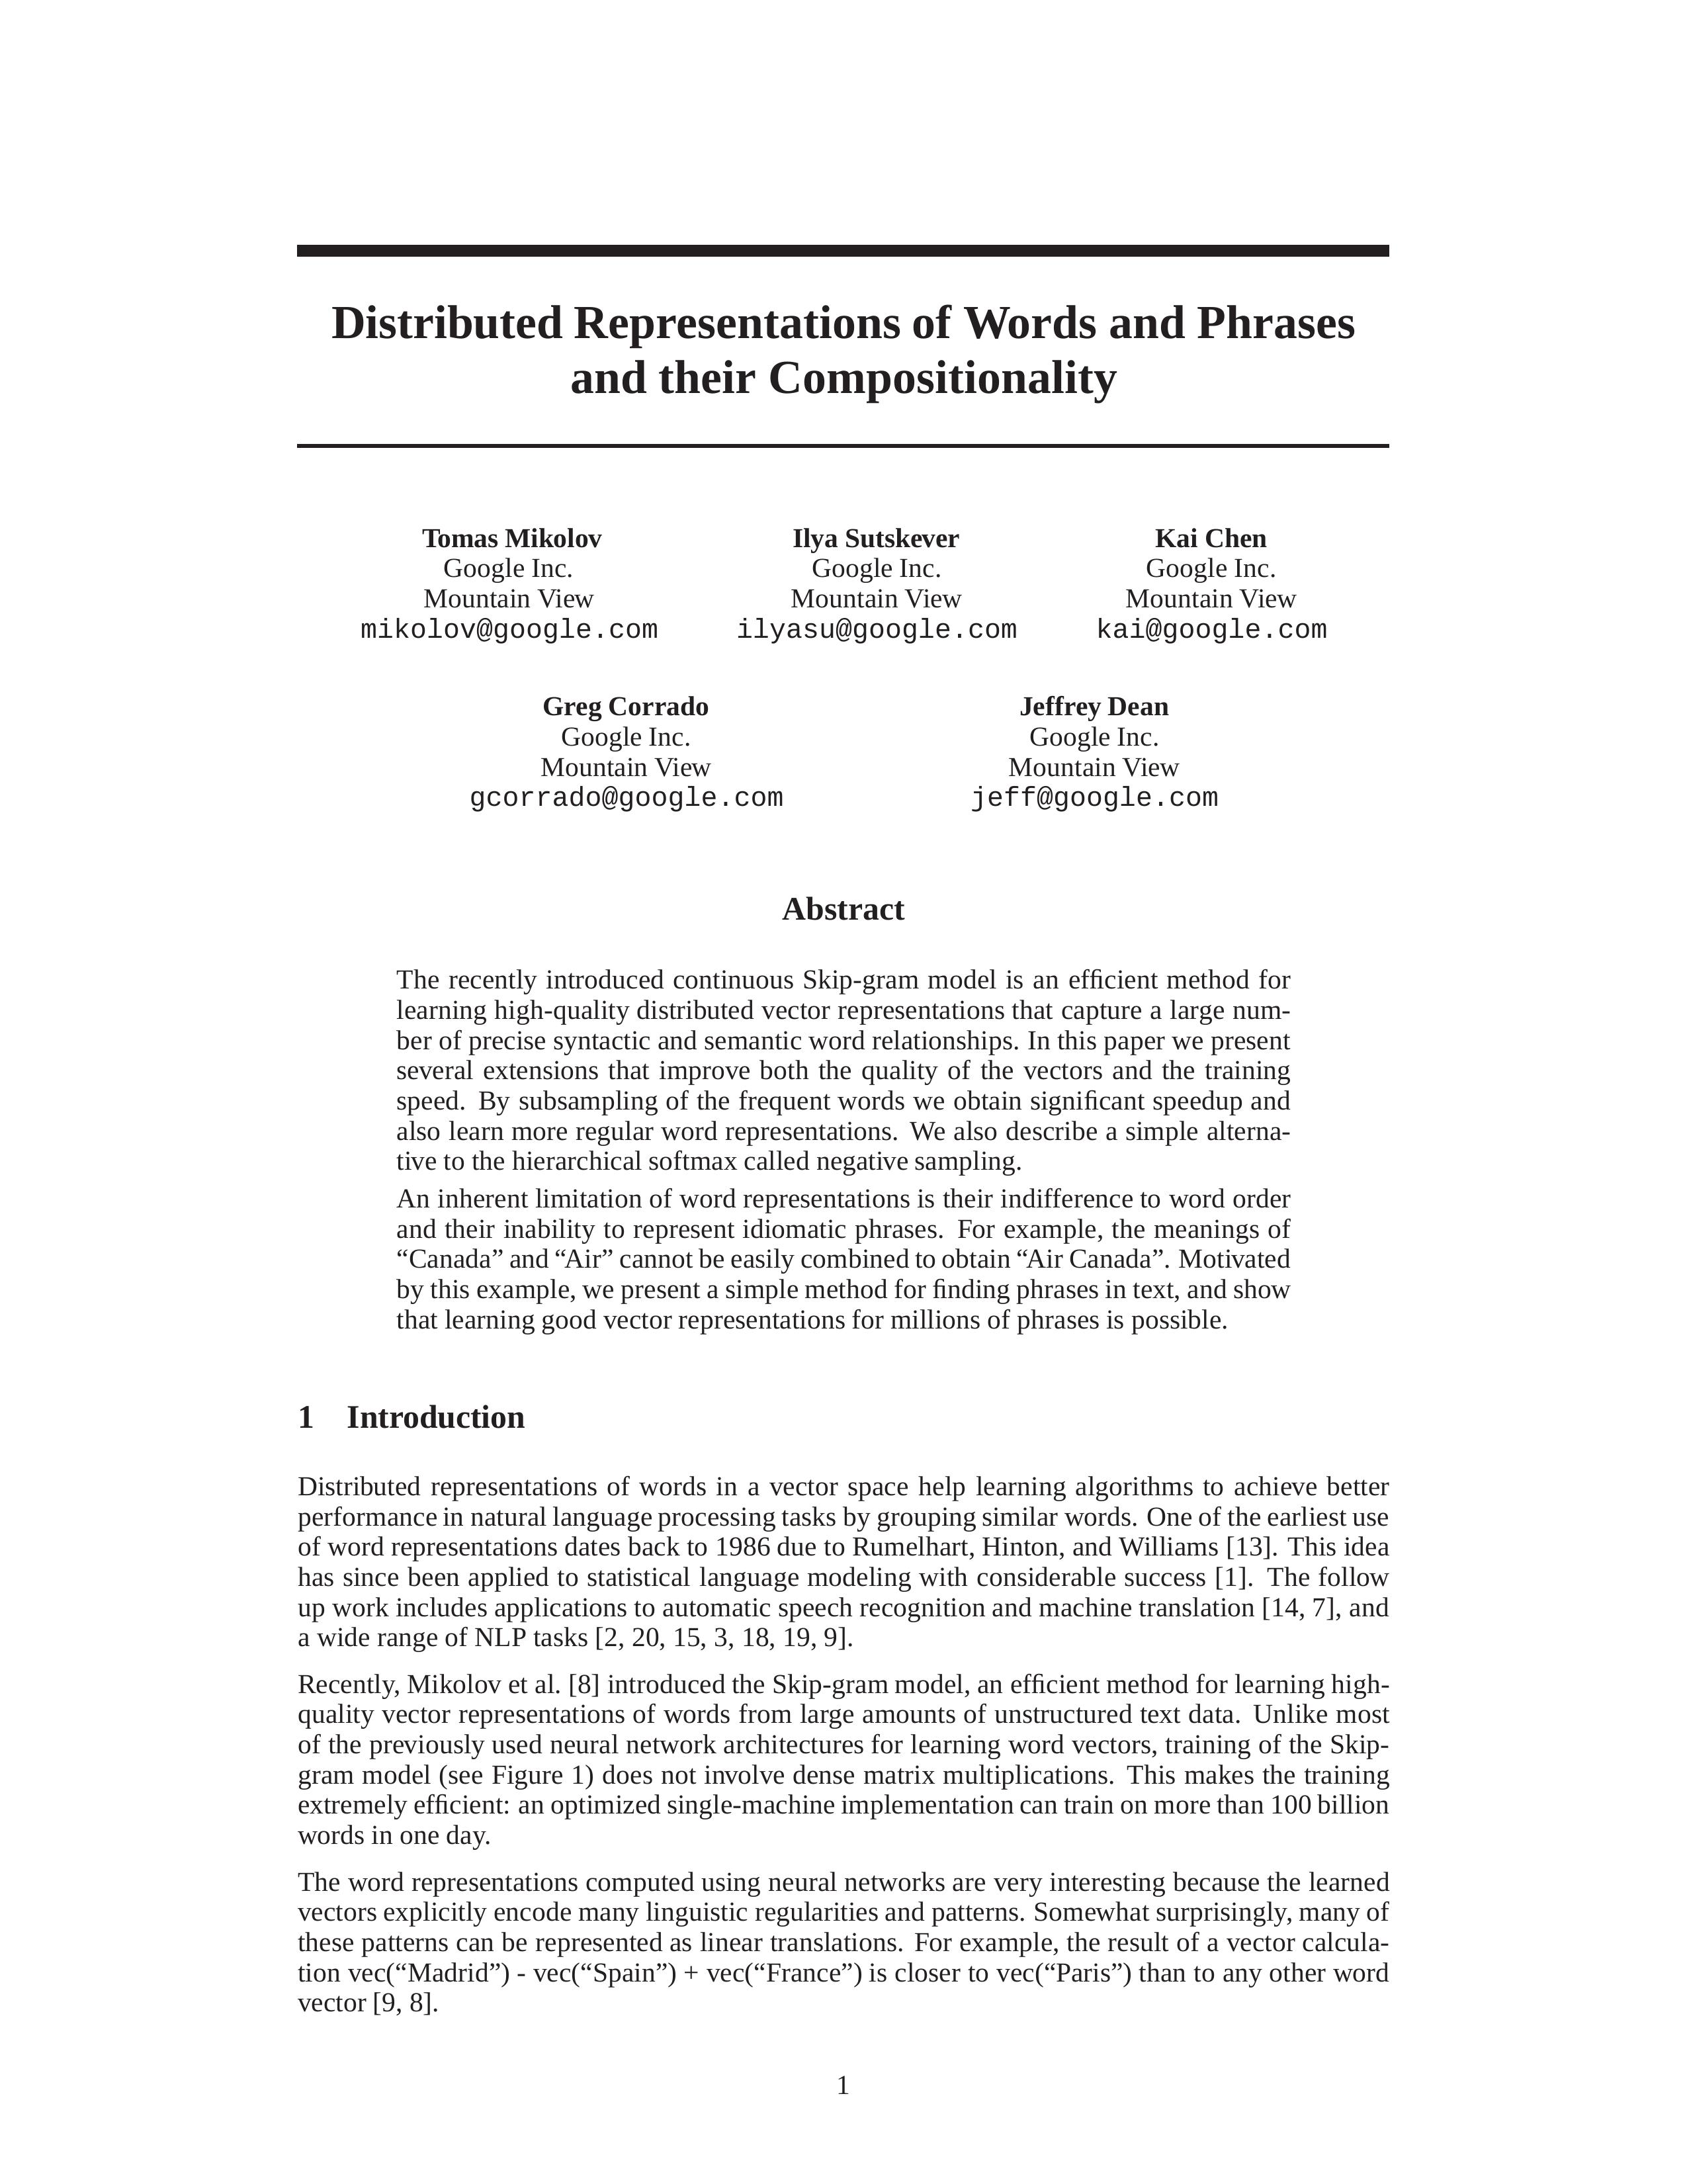

In [ ]:
imgs[0]

### lets caption all the images

In [ ]:
# Assuming 'loaded_images' is the list of PIL images
for img in imgs:
    caption = generate_caption_from_image(img)
    print(caption)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a close up of a document with a black and white image


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1273: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a close up of a paper with a diagram on it
a close up of a paper with a number of calculations
a close up of a paper with a graph on it
a close up of a document with a table of numbers on it
a close up of a table with a number of items on it
a close up of a document with a number of words on it
a close up of a text description of a table with a number of items
a close up of a book with a bunch of text on it


In [ ]:
'''
logits = result.logits
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])
'''

'\nlogits = result.logits\n# model predicts one of the 1000 ImageNet classes\npredicted_class_idx = logits.argmax(-1).item()\nprint("Predicted class:", model.config.id2label[predicted_class_idx])\n'

In [ ]:
image = encode_image('/content/drive/MyDrive/books/page_1.png')

# Process 'result' as needed

In [ ]:
result

In [ ]:
# Example usage
pdf_path = '/content/drive/MyDrive/books/Training language models to follow instructions.pdf'  # Replace with your PDF file path
extracted_text = extract_text_from_pdf(pdf_path)
preprocessed_text = preprocess_text(extracted_text)
print(extracted_text)

# Note: This is a basic template. Depending on your specific requirements,
# you might need to add more sophisticated text processing steps.